#### DATA VISUALIZATION

<br>

# Airline Analysis
<hr>

Imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients.
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day (in the week) of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
flight = pd.read_csv('flight.csv')
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


### Univariate Analysis

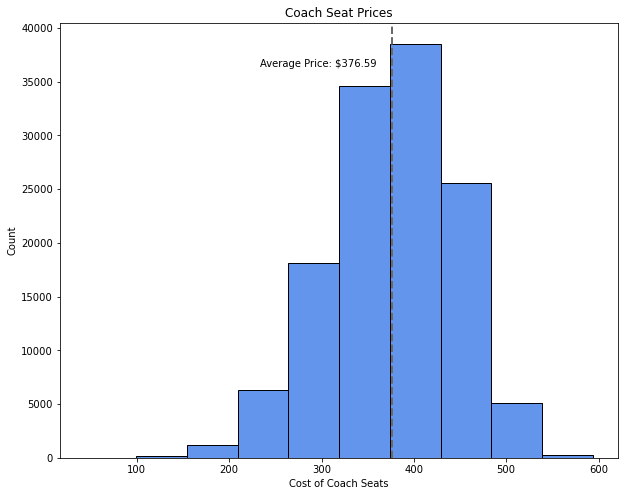

The lowest price for a coach seat is around $100, and the highest price is a little less than $600.

Because this takes the price for all the coach seats regardless of how long the flight was, I would say $500 for a coach seat is very unreasonable since the average is $376.59, and the majority (around $400) tend to be around the average price.


In [67]:
all_coach_prices = flight['coach_price']

plt.figure(figsize = (10, 8))
plt.hist(all_coach_prices, edgecolor = 'black', color = 'cornflowerblue')
plt.axvline(all_coach_prices.mean(), linestyle = 'dashed', linewidth = 2, color = 'dimgray')

plt.title("Coach Seat Prices")
plt.xlabel("Cost of Coach Seats")
plt.ylabel("Count")

min_ylim, max_ylim = plt.ylim()
plt.text(all_coach_prices.mean()*0.62, max_ylim*0.9, 'Average Price: ${:.2f}'.format(all_coach_prices.mean()))

plt.show()

print("The lowest price for a coach seat is around $100, and the highest price is a little less than $600.")
print()
print("Because this takes the price for all the coach seats regardless of how long the flight was, I would say $500 for a coach seat is very unreasonable since the average is $376.59, and the majority (around $400) tend to be around the average price.") 

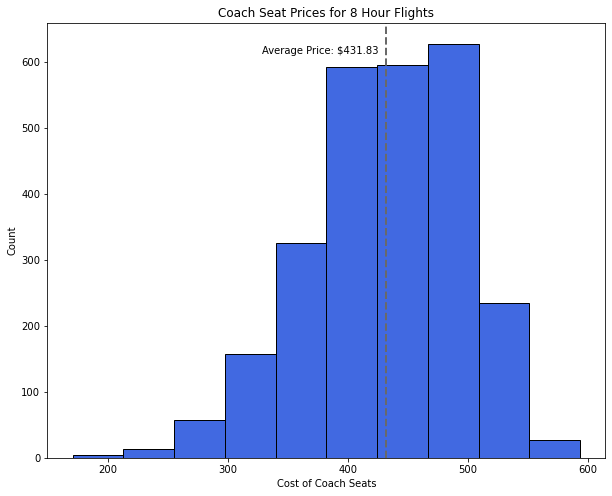

The lowest price for a coach seat in an 8 hour flight is around $150, and the highest price is a little less than $600.

Now that this data takes the price of coach seats in 8 hour flights, I would say $500 for a coach seat is somewhat a reasonable price, but the average price is $431.83, meaning most of the coach seats are priced higer than the average.


In [66]:
coach_price_hour_8 = flight['coach_price'][flight['hours'] == 8]
#print(coach_price_hour_8)

plt.figure(figsize = (10, 8))
plt.hist(coach_price_hour_8, edgecolor = 'black', color = 'royalblue')
plt.axvline(coach_price_hour_8.mean(), linestyle = 'dashed', linewidth = 2, color = 'dimgray')

plt.title("Coach Seat Prices for 8 Hour Flights")
plt.xlabel("Cost of Coach Seats")
plt.ylabel("Count")

min_ylim, max_ylim = plt.ylim()
plt.text(coach_price_hour_8.mean()*0.76, max_ylim*0.93, 'Average Price: ${:.2f}'.format(coach_price_hour_8.mean()))

plt.show()

print("The lowest price for a coach seat in an 8 hour flight is around $150, and the highest price is a little less than $600.")
print()
print("Now that this data takes the price of coach seats in 8 hour flights, I would say $500 for a coach seat is somewhat a reasonable price, but the average price is $431.83, meaning most of the coach seats are priced higer than the average.") 

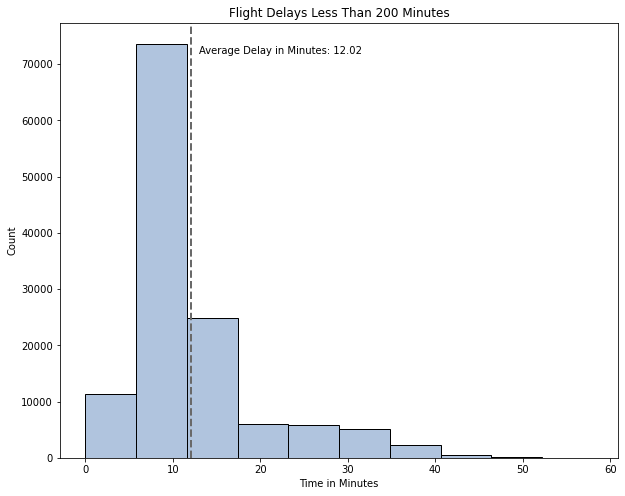

Most flight delays tend to be around 10 minutes, which is close to the average of 12.02 minutes. Therefore, when setting up connecting flights, it's important to be aware flights may be delayed by about 10 minutes.


In [85]:
#because a majorityh flight delays are less than 200 minutes, we'll put that in the variable
flight_delays = flight['delay'][flight['delay'] < 200]
#print(flight_delays)

plt.figure(figsize = (10, 8))
plt.hist(flight_delays, edgecolor = 'black', color = 'lightsteelblue')
plt.axvline(flight_delays.mean(), linestyle = 'dashed', linewidth = 2, color = 'dimgray')

plt.title("Flight Delays Less Than 200 Minutes")
plt.xlabel("Time in Minutes")
plt.ylabel("Count")

min_ylim, max_ylim = plt.ylim()
plt.text(flight_delays.mean()*1.08, max_ylim*0.93, 'Average Delay in Minutes: {:.2f}'.format(flight_delays.mean()))

plt.show()

print("Most flight delays tend to be around 10 minutes, which is close to the average of 12.02 minutes. Therefore, when setting up connecting flights, it's important to be aware flights may be delayed by about 10 minutes.")

### Bivariate Analysis

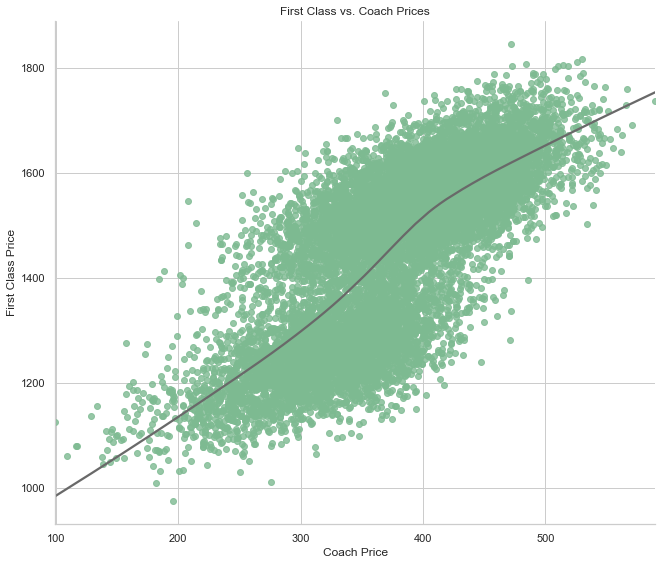

Based on the graph, we can see that as the coach prices go up, so do the first class prices.


In [107]:
all_firstclass_prices = flight['firstclass_price']

perc = 0.1 #10%
flight_sub = flight.sample(n = int(flight.shape[0] * perc))

#the scatterplot has a lot of overlaying data, use .lmplot
#sns.scatterplot(x = all_coach_prices, y = all_firstclass_prices)

sns.set_style("whitegrid")
sns.set_palette('crest')
ax = sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight_sub, line_kws = {'color': 'dimgray'}, lowess = True)
ax.fig.set_size_inches(10, 8)

plt.title("First Class vs. Coach Prices")
ax.set(xlabel='Coach Price', ylabel='First Class Price')
plt.show()

print("Based on the graph, we can see that as the coach prices go up, so do the first class prices.")

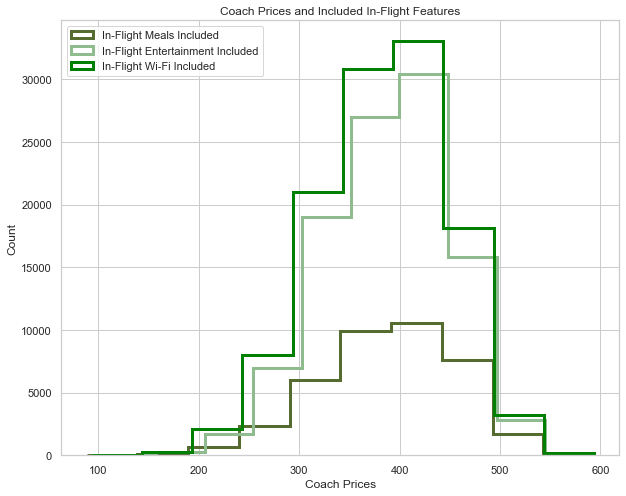

When we look at the graph, we can see that flights price between $250 and around $450 include in-flight entertainment and Wi-Fi; however, there's a very small number of in-flight meals compared to the other in-flight features, but it's still has around $400 as the most common price for meals.


In [143]:
coach_prices_inflight_meal = flight['coach_price'][flight['inflight_meal'] == 'Yes']
#print(coach_prices_inflight_meal)
coach_prices_inflight_entertainment = flight['coach_price'][flight['inflight_entertainment'] == 'Yes']
coach_prices_inflight_wifi = flight['coach_price'][flight['inflight_wifi'] == 'Yes']

plt.hist(coach_prices_inflight_meal, histtype = 'step', linewidth = 3, color = 'darkolivegreen')
plt.hist(coach_prices_inflight_entertainment, histtype = 'step', linewidth = 3, color = 'darkseagreen')
plt.hist(coach_prices_inflight_wifi, histtype = 'step', linewidth = 3, color = 'green')

plt.title("Coach Prices and Included In-Flight Features")
plt.xlabel("Coach Prices")
plt.ylabel("Count")
plt.legend(['In-Flight Meals Included', 'In-Flight Entertainment Included', 'In-Flight Wi-Fi Included'], loc = 2)

plt.show()

print("When we look at the graph, we can see that flights price between $250 and around $450 include in-flight entertainment and Wi-Fi; however, there's a very small number of in-flight meals compared to the other in-flight features, but it's still has around $400 as the most common price for meals.")

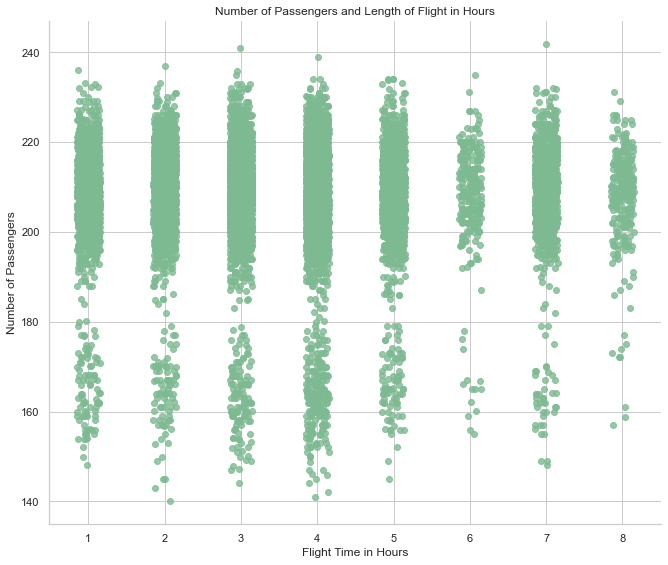

As we can see from the graph, regardless of flight time, most flights will have about 190 to 230 passengers.


In [151]:
# num_of_passengers = flight['passengers']
#print(num_of_passengers)
length_of_flight = flight['hours']
#print(length_of_flight)

#scatter plot is too difficult to see the result
#sns.scatterplot(length_of_flight, num_of_passengers)

sns.set_style("whitegrid")
sns.set_palette('crest')
ax = sns.lmplot(x = 'hours', y = 'passengers', data = flight_sub, x_jitter = 0.15, y_jitter = 0.15, fit_reg = False)
ax.fig.set_size_inches(10, 8)

plt.title("Number of Passengers and Length of Flight in Hours")
ax.set(xlabel='Flight Time in Hours', ylabel='Number of Passengers')
plt.show()

print("As we can see from the graph, regardless of flight time, most flights will have about 190 to 230 passengers.")

### Multivariate Analysis

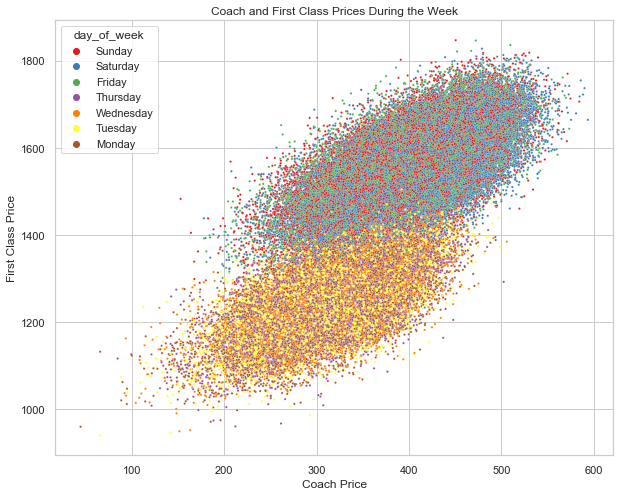

From the graph we can see that during the week, seat prices for both coach and first class are a lot lower than on the weekend.


In [180]:
ordered_days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories = ordered_days, ordered = True)

sns.set_palette('Set1')
ax = sns.scatterplot(x = all_coach_prices, y = all_firstclass_prices, hue = flight['day_of_week'], s = 5)

plt.title("Coach and First Class Prices During the Week")
ax.set(xlabel='Coach Price', ylabel='First Class Price')

plt.show()

print("From the graph we can see that during the week, seat prices for both coach and first class are a lot lower than on the weekend.")

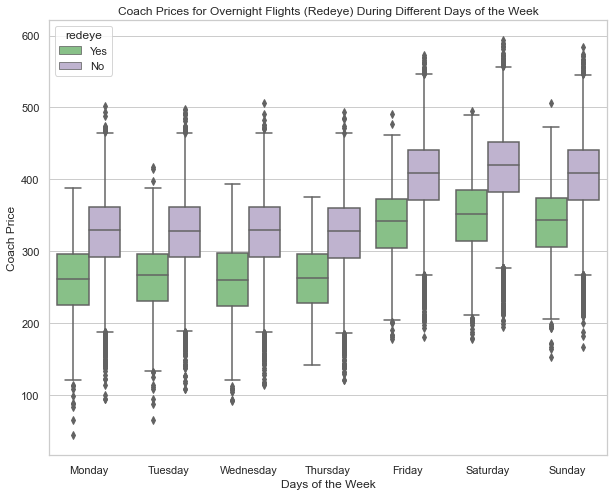

We can see that flying overnight (redeye) flights tend to be nearly $100 cheaper than if flying during the day. We can also see that prices go up almost $100 on the weekend, but we knew that from the previous graph.


In [183]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories = ordered_days, ordered = True)

ax = sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye', data = flight, palette = 'Accent')

plt.title("Coach Prices for Overnight Flights (Redeye) During Different Days of the Week")
ax.set(xlabel='Days of the Week', ylabel='Coach Price')

plt.show()

print("We can see that flying overnight (redeye) flights tend to be nearly $100 cheaper than if flying during the day. We can also see that prices go up almost $100 on the weekend, but we knew that from the previous graph.")